In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
a= pd.read_csv("train_values.csv")
b= pd.read_csv("train_labels.csv")
df= b.merge(a, on ='patient_id')
df.head(10)

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
5,ldukkw,0,1,normal,130,3,0,0,0,180,0.0,1,42,150,0
6,2gbyh9,1,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0
7,daa9kp,1,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1
8,3nwy2n,1,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1
9,1r508r,0,2,normal,120,3,0,0,0,219,1.6,0,50,158,0


In [2]:
df.isnull().sum()

patient_id                              0
heart_disease_present                   0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [3]:

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
patient_id                              180 non-null object
heart_disease_present                   180 non-null int64
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes

(180, 15)

In [4]:
df.describe()

,heart_disease_present,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.444444,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.498290,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,0.000000,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,0.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,0.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,1.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,1.000000,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [5]:
df.head(7)

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
5,ldukkw,0,1,normal,130,3,0,0,0,180,0.0,1,42,150,0
6,2gbyh9,1,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0


In [6]:
df.heart_disease_present.unique()

array([0, 1], dtype=int64)

In [7]:
df.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [8]:
df.corr()

,heart_disease_present,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
heart_disease_present,1.000000,0.344224,0.078506,0.412829,0.421519,0.003379,0.145933,0.079775,0.382930,0.335421,0.138255,-0.375352,0.448647
slope_of_peak_exercise_st_segment,0.344224,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459
resting_blood_pressure,0.078506,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397
chest_pain_type,0.412829,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266
num_major_vessels,0.421519,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407
fasting_blood_sugar_gt_120_mg_per_dl,0.003379,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956
resting_ekg_results,0.145933,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773
serum_cholesterol_mg_per_dl,0.079775,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139
oldpeak_eq_st_depression,0.382930,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167
sex,0.335421,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096


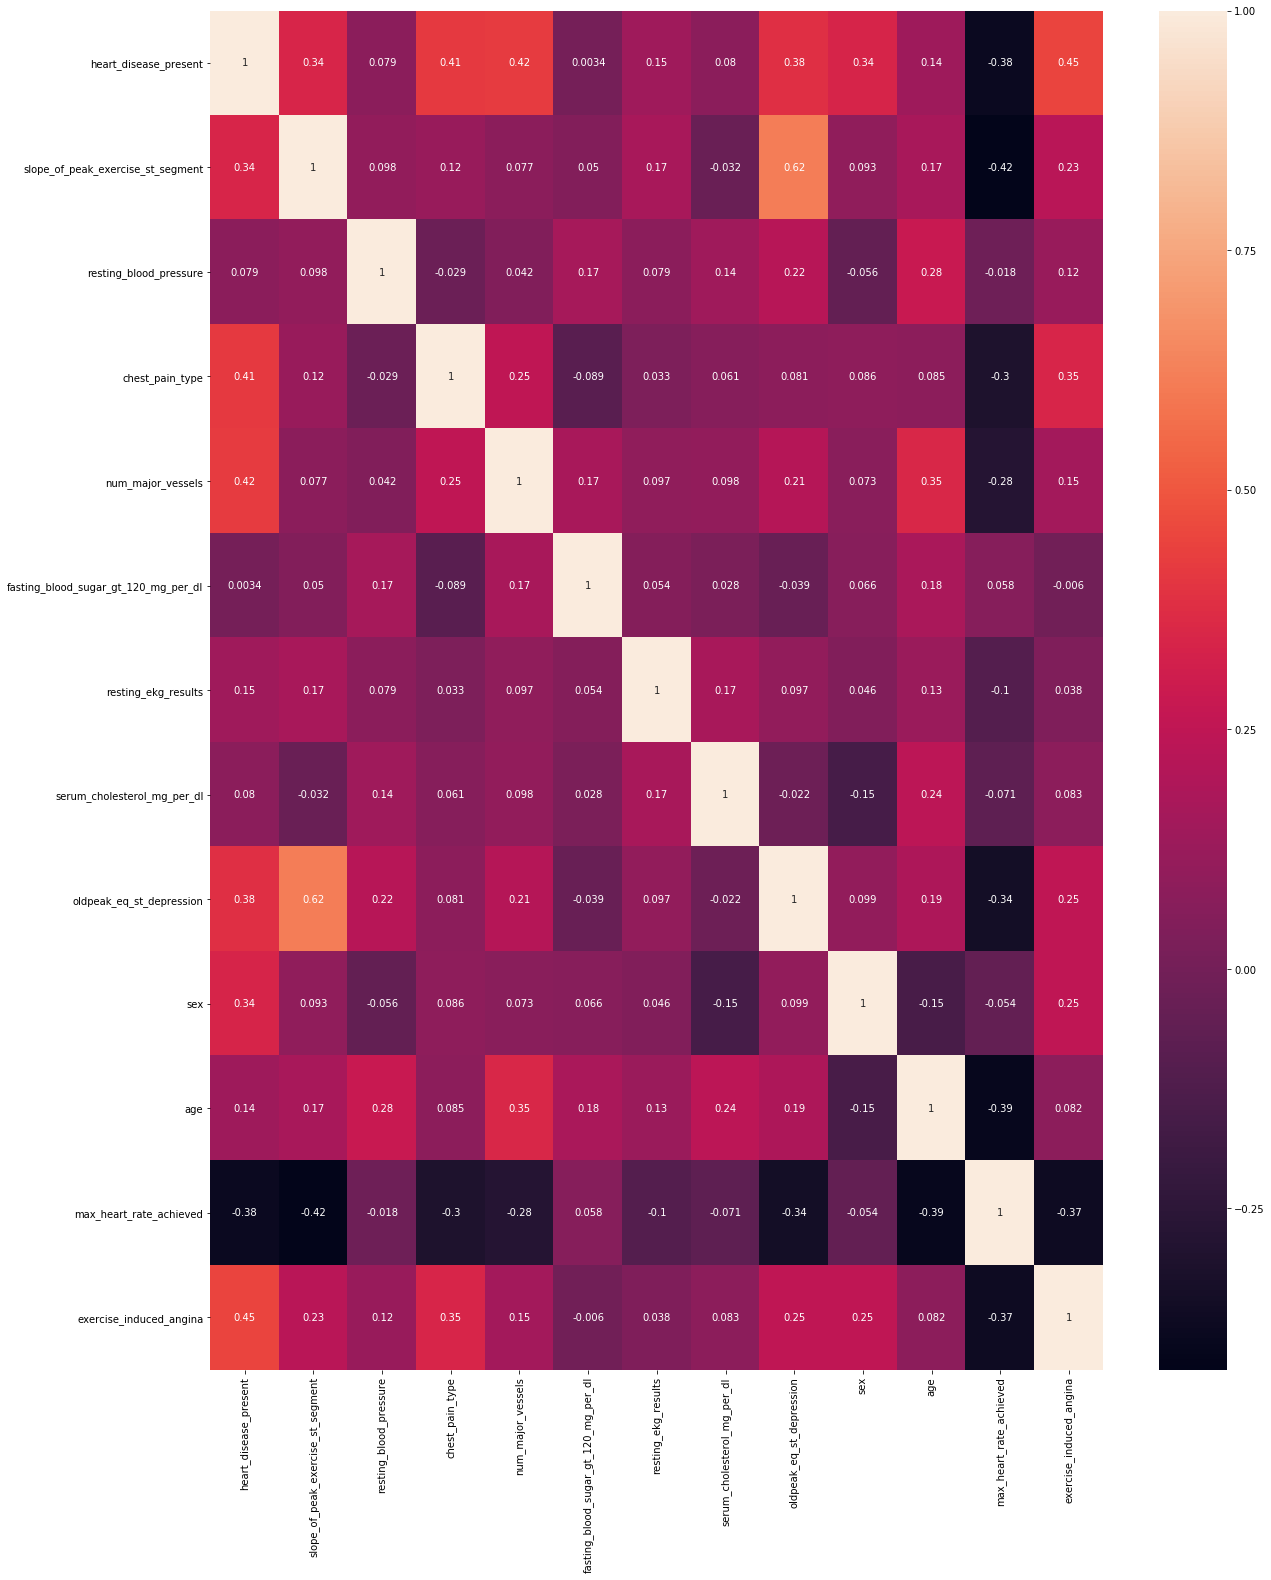

In [9]:
plt.subplots(figsize=(20,25))
sns.heatmap(df.corr(),annot =True)

In [10]:
df.columns

Index(['patient_id', 'heart_disease_present',
       'slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [11]:
x=df[['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina']]
x

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
5,1,normal,130,3,0,0,0,180,0.0,1,42,150,0
6,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0
7,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1
8,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1
9,2,normal,120,3,0,0,0,219,1.6,0,50,158,0


In [12]:
 y= df['heart_disease_present']
 y

0      0
1      0
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     1
18     0
19     1
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     1
29     0
      ..
150    0
151    0
152    1
153    1
154    1
155    1
156    0
157    0
158    0
159    1
160    0
161    1
162    1
163    1
164    0
165    0
166    0
167    1
168    0
169    0
170    1
171    1
172    1
173    1
174    0
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.externals import joblib
x=df[['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina']]

y= df['heart_disease_present'].values
print(y)
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=7)
k=1
pro= KNeighborsClassifier 




# x_test= pd.read_csv("test_values.csv")
# x_test.head()

In [14]:
# lr= LinearRegression()
# lr.fit(x,y)
# pr = lr.predict(x_test)
# print(pr[0:4])


# # y_train.unuque()
# df['thal'].shape

In [18]:
 df['thal'].rename({'normal'=int(0),'reversible_defect'=int(1),'fixed_defect'= int(2)})
df

SyntaxError: invalid syntax (<ipython-input-18-c6e4023a40ce>, line 1)